In [1]:
import pandas as pd

In [16]:
df = pd.read_csv('../data/lenta_news.csv', parse_dates=['date'],
                 dtype={'url': object, 'title': object, 'text': object, 'topic': object, 'tags': object})

In [17]:
df.head()

,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914-09-16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914-09-16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914-09-17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914-09-17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914-09-18


In [18]:
df.tail()

,url,title,text,topic,tags,date
859399,https://lenta.ru/news/2025/04/15/poyavilos-vid...,Появилось видео последствий атаки дрона ВСУ на...,В сети появилось видео последствий атаки дрона...,Россия,Происшествия,2025-04-15
859400,https://lenta.ru/news/2025/04/15/kallas-vyskaz...,Каллас высказалась о поставках ракет Taurus Ук...,Глава дипломатииЕвропейского союза(ЕС)Кая Калл...,Мир,Политика,2025-04-15
859401,https://lenta.ru/news/2025/04/15/v-rade/,В Раде рассказали о попавшем в тупик Зеленском,ПрезидентУкраиныВладимир Зеленскийоказался в т...,Мир,Политика,2025-04-15
859402,https://lenta.ru/news/2025/04/15/raskryty-posl...,Раскрыты последствия атаки дрона ВСУ на жилой ...,ВКурскедронВооруженных силУкраины(ВСУ) врезалс...,Россия,Происшествия,2025-04-15
859403,https://lenta.ru/news/2025/04/15/stalo-izvestn...,Стало известно об ударе ВСУ по нескольким мног...,В результате массовой атаки БПЛА вКурскепостра...,Россия,Происшествия,2025-04-15


In [19]:
df.shape

(859404, 6)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859404 entries, 0 to 859403
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   url     859404 non-null  object        
 1   title   859403 non-null  object        
 2   text    859399 non-null  object        
 3   topic   797388 non-null  object        
 4   tags    830667 non-null  object        
 5   date    859404 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 39.3+ MB


In [23]:
df.drop(columns=['tags'], inplace=True)

In [24]:
df[df[['url', 'title', 'text', 'topic', 'date']].isnull().any(axis=1)]

,url,title,text,topic,date
112873,https://lenta.ru/news/2005/02/18/dovolstvie/,Путин повысил довольствие военнослужащим и пен...,Президент РФ Владимир Путин подписал указы о п...,NaN,2005-02-18
112894,https://lenta.ru/news/2005/02/18/terms/,Французы перестали понимать своих бюрократов,Во Франции опубликован словарь из 3 тысяч бюро...,NaN,2005-02-18
113287,https://lenta.ru/news/2005/02/23/miting/,Московские левые отметили 23 февраля шествием ...,23 февраля в Москве прошли праздничные митинги...,NaN,2005-02-23
114018,https://lenta.ru/news/2005/03/03/money/,Исправление ошибок монетизации обошлось бюджет...,Председатель комитета Госдумы по аграрным вопр...,NaN,2005-03-03
114451,https://lenta.ru/news/2005/03/08/rules/,"Люксембург недоволен экономическим пактом, раз...",Министр финансов Люксембурга Жан-Клод Джанкер ...,NaN,2005-03-08
...,...,...,...,...,...
851726,https://lenta.ru/news/2024/08/03/3-avgusta-kak...,3 августа: какой праздник сегодня отмечают в Р...,3 августа в мире отмечают Международный день б...,NaN,2024-08-03
852356,https://lenta.ru/news/2024/08/24/24-avgusta-ka...,24 августа: какой праздник сегодня отмечают в ...,24 августа в мире отмечают День странной музык...,NaN,2024-08-24
852415,https://lenta.ru/news/2024/08/26/26-avgusta-ka...,26 августа: какой праздник сегодня отмечают в ...,26 августа 2024 года отмечается 16-я годовщина...,NaN,2024-08-26
858807,https://lenta.ru/news/2025/03/27/zelenskiy-ots...,Зеленский оценил свои перспективы в сравнении ...,ПрезидентУкраиныВладимир Зеленскийназвал возра...,NaN,2025-03-27


In [25]:
df.dropna(subset=['url', 'title', 'text', 'topic', 'date'], inplace=True)

In [26]:
df[df['text'].str.contains(' ')]

,url,title,text,topic,date
323,https://lenta.ru/news/1999/09/20/bank_skandal/,Российский олигарх не будет отчитываться перед...,"Газета Financial Times сообщила, что на этой н...",Россия,1999-09-20
471,https://lenta.ru/news/1999/09/24/plane/,Авиакатастрофы в Бангкоке чудом удалось избежать,"Пилоту пассажирского самолета ""Боинг-747"", авс...",Мир,1999-09-24
742,https://lenta.ru/news/1999/10/07/turkey_explos...,Два мощных взрыва в Стамбуле,В среду во второй половине дня в Стамбуле прог...,Мир,1999-10-07
1125,https://lenta.ru/news/1999/10/22/account_ees/,"Разблокированы счета РАО ""ЕЭС""",Министр по налогам и сборам Российской федерац...,Экономика,1999-10-22
1266,https://lenta.ru/news/1999/10/28/basket/,Россияне отныне будут потреблять в корзину,В среду Государственной Думой принят Федеральн...,Экономика,1999-10-28
...,...,...,...,...,...
859165,https://lenta.ru/news/2025/04/08/etiket/,Людей по всему миру возмущают мерзкие выходки ...,"Переполненные рейсы, крошечные кресла, очереди...",Путешествия,2025-04-08
859245,https://lenta.ru/news/2025/04/10/karlson-zayav...,Карлсон заявил о проигрыше США в войне против ...,Соединенные Штаты проиграли войну против Росси...,Интернет и СМИ,2025-04-10
859323,https://lenta.ru/news/2025/04/13/v-turtsii-ots...,В Турции прокомментировали возможность проведе...,"Саммит России иУкраинывТурциивозможен, однако ...",Мир,2025-04-13
859381,https://lenta.ru/news/2025/04/15/radiostantsiy...,«Радиостанция Судного дня» передала четыре заг...,В эфире «Радиостанции Судного дня» УВБ-76 проз...,Из жизни,2025-04-15


In [27]:
df['title'] = df['title'].str.replace(' ', ' ')
df['text'] = df['text'].str.replace(' ', ' ')

In [28]:
df[df.duplicated(subset=['title'])]

,url,title,text,topic,date
60,https://lenta.ru/news/1999/09/03/tv/,"Минпечати запретило вещание компании ""Петербург""",С 0 часов 2 сентября приостановлено вещание те...,Россия,1999-09-03
3195,https://lenta.ru/news/2000/01/11/yeltsin/,Фонду Ельцина выделят помещение в Кремле,Борис Ельцин намерен организовать собственный ...,Россия,2000-01-11
5548,https://lenta.ru/news/2000/03/22/europe/,В Чечню прибудут эксперты Совета Европы,Совет Европы получил принципиальное согласие М...,Россия,2000-03-22
10281,https://lenta.ru/news/2000/07/17/opec/,Цены на нефть начали падать,Организация экспортеров нефти ОПЕК приняла реш...,Экономика,2000-07-17
11752,https://lenta.ru/news/2000/08/19/fire/,Пожар в центре Москвы ликвидирован,В центре Москвы в доме 15 по улице Новая Хохло...,Россия,2000-08-19
...,...,...,...,...,...
859106,https://lenta.ru/news/2025/04/06/v-moskve-zago...,В Москве загорелся жилой дом,ВМосквена улице Лесная произошел пожар в жилом...,Россия,2025-04-06
859125,https://lenta.ru/news/2025/04/06/na-vsey-terri...,По всей Украине объявили воздушную тревогу,На всей территорииУкраиныбыла объявлена воздуш...,Бывший СССР,2025-04-06
859126,https://lenta.ru/news/2025/04/06/v-kieve-razda...,В Киеве раздались взрывы,ВКиевепрогремели взрывы. Об этомсообщаетукраин...,Бывший СССР,2025-04-06
859304,https://lenta.ru/news/2025/04/12/v-odesse-razd...,В Одессе раздались взрывы,ВОдессепрогремели взрывы. Об этомсообщилмэр го...,Бывший СССР,2025-04-12


In [29]:
df[df['title'] == 'Минпечати запретило вещание компании "Петербург"']

,url,title,text,topic,date
49,https://lenta.ru/news/1999/09/02/television/,"Минпечати запретило вещание компании ""Петербург""",С 0 часов 2 сентября приостановлено вещание те...,Россия,1999-09-02
60,https://lenta.ru/news/1999/09/03/tv/,"Минпечати запретило вещание компании ""Петербург""",С 0 часов 2 сентября приостановлено вещание те...,Россия,1999-09-03


Removing articles with the same text

In [30]:
df['title_clean'] = (
    df['title']
    .str.lower()
    .str.replace(r'[^а-яё\s]', ' ', regex=True)
    .str.replace(r' +', ' ', regex=True)
    .str.replace('\n', ' ')
)

df['text_clean'] = (
    df['text']
    .str.lower()
    .str.replace(r'[^а-яё\s]', ' ', regex=True)
    .str.replace(r' +', ' ', regex=True)
    .str.replace('\n', ' ')
)

In [31]:
df.head()

,url,title,text,topic,date,title_clean,text_clean
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,1914-09-16,русские войска вступили в пределы венгрии,бои у сопоцкина и друскеник закончились отступ...
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,1914-09-16,празднование столетия м ю лермонтова отложено,министерство народного просвещения в виду прои...
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,1914-09-17,,штабс капитан п н нестеров на днях увидев в ра...
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,1914-09-17,бульдог гонец под льежем,фотограф корреспондент рассказывает случай кот...
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,1914-09-18,под люблином пойман швабский зверь,лица приехавшие в варшаву из люблина передают ...


In [52]:
df[df.duplicated(subset=['text_clean'])]

,url,title,text,topic,date,title_clean,text_clean


In [53]:
df.drop_duplicates(subset=['text_clean'], inplace=True)
df.drop_duplicates(subset=['url'], inplace=True)

In [34]:
df[df['title'] == 'Фонду Ельцина выделят помещение в Кремле']

,url,title,text,topic,date,title_clean,text_clean
3090,https://lenta.ru/news/2000/01/02/yeltsin/,Фонду Ельцина выделят помещение в Кремле,Борис Ельцин намерен организовать собственный ...,Россия,2000-01-02,фонду ельцина выделят помещение в кремле,борис ельцин намерен организовать собственный ...
3195,https://lenta.ru/news/2000/01/11/yeltsin/,Фонду Ельцина выделят помещение в Кремле,Борис Ельцин намерен организовать собственный ...,Россия,2000-01-11,фонду ельцина выделят помещение в кремле,борис ельцин намерен организовать собственный ...


In [35]:
df[df['title'] == 'Цены на нефть начали падать']

,url,title,text,topic,date,title_clean,text_clean
8586,https://lenta.ru/news/2000/06/06/oil/,Цены на нефть начали падать,На лондонской и нью-йоркской нефтяных биржах п...,Экономика,2000-06-06,цены на нефть начали падать,на лондонской и нью йоркской нефтяных биржах п...
10281,https://lenta.ru/news/2000/07/17/opec/,Цены на нефть начали падать,Организация экспортеров нефти ОПЕК приняла реш...,Экономика,2000-07-17,цены на нефть начали падать,организация экспортеров нефти опек приняла реш...
12694,https://lenta.ru/news/2000/09/11/opec/,Цены на нефть начали падать,В понедельник в электронной системе торгов New...,Экономика,2000-09-11,цены на нефть начали падать,в понедельник в электронной системе торгов цен...
22198,https://lenta.ru/news/2001/02/21/oil/,Цены на нефть начали падать,Стоимость базовых сортов нефти на Нью-Йоркской...,Экономика,2001-02-21,цены на нефть начали падать,стоимость базовых сортов нефти на нью йоркской...


Removing similar articles with the same title (happens when a news receives update)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

possible_duplicates = df[df.duplicated(subset=['title_clean'], keep=False)].reset_index()
vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(5, 5))
X = vectorizer.fit_transform(possible_duplicates['text_clean'])

# df = df.drop(index=to_drop)

In [37]:
X.shape

(10589, 151874)

In [38]:
sim_matrix = cosine_similarity(X)

In [39]:
similarity_threshold = 0.8

to_drop = set()

doubles = set()

for title in possible_duplicates['title'].unique():
    candidates = possible_duplicates[possible_duplicates['title'] == title].reset_index()

    pairs = candidates.merge(candidates, how='cross', suffixes=('_i', '_j'))

    pairs = pairs[pairs['level_0_i'] < pairs['level_0_j']]

    for _, row in pairs.iterrows():
        i, j = row['level_0_i'], row['level_0_j']
        if sim_matrix[i, j] > similarity_threshold:
            if len(row['text_clean_i']) < len(row['text_clean_j']):
                doubles.add((row['index_i'], row['index_j']))
                to_drop.add(row['index_i'])
            else:
                doubles.add((row['index_j'], row['index_i']))
                to_drop.add(row['index_j'])

In [40]:
# to_drop

In [41]:
# doubles

In [42]:
df.loc[[3090, 3195]]

,url,title,text,topic,date,title_clean,text_clean
3090,https://lenta.ru/news/2000/01/02/yeltsin/,Фонду Ельцина выделят помещение в Кремле,Борис Ельцин намерен организовать собственный ...,Россия,2000-01-02,фонду ельцина выделят помещение в кремле,борис ельцин намерен организовать собственный ...
3195,https://lenta.ru/news/2000/01/11/yeltsin/,Фонду Ельцина выделят помещение в Кремле,Борис Ельцин намерен организовать собственный ...,Россия,2000-01-11,фонду ельцина выделят помещение в кремле,борис ельцин намерен организовать собственный ...


In [43]:
df.drop(index=to_drop, inplace=True)

In [54]:
df.shape

(795988, 7)

EDA

Date range

In [58]:
df['date'].min(), "—", df['date'].max()

(Timestamp('1914-09-16 00:00:00'), '—', Timestamp('2025-04-15 00:00:00'))

In [57]:
df['topic'].nunique()

27

In [46]:
df['topic'].value_counts().describe()

,count
count,27.000000
mean,29481.444444
std,45976.447108
min,1.000000
25%,89.000000
50%,7415.000000
75%,51201.500000
max,171005.000000


<Axes: xlabel='topic'>

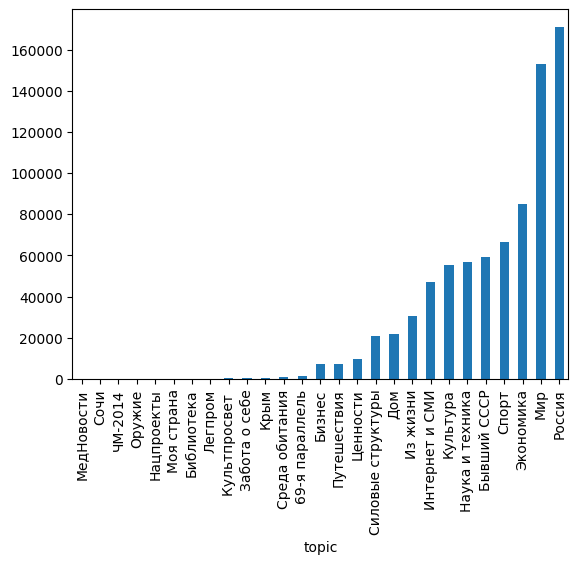

In [47]:
df['topic'].value_counts().sort_values().plot(kind='bar')


<ipython-input-59-12a583e265ef>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index('date').resample('M').size()


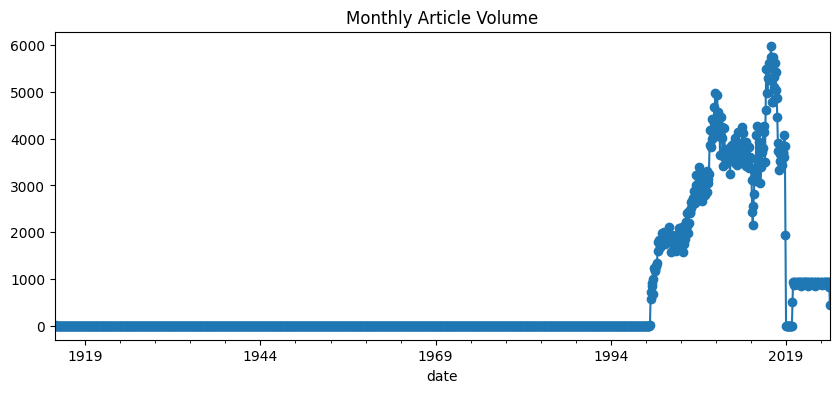

In [59]:
monthly = df.set_index('date').resample('M').size()
monthly.plot(marker='o', figsize=(10,4), title='Monthly Article Volume');

In [60]:
df['title_len'] = df['title_clean'].str.split().apply(len)
df['text_len']  = df['text_clean'].str.split().apply(len)

Text(0.5, 1.0, 'Text Length (tokens)')

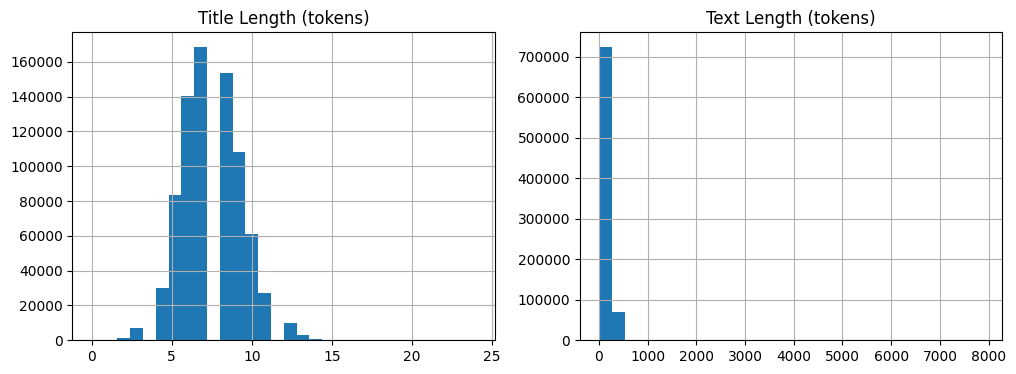

In [63]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(12,4))
df['title_len'].hist(bins=30, ax=axes[0])
axes[0].set_title('Title Length (tokens)')
df['text_len'].hist(bins=30, ax=axes[1])
axes[1].set_title('Text Length (tokens)')

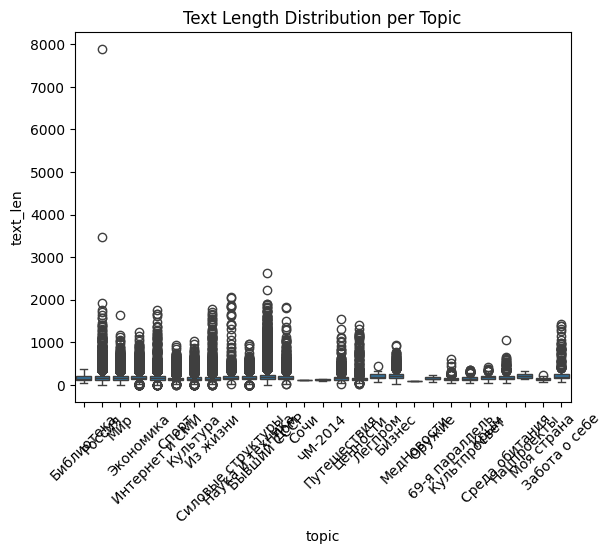

In [65]:
import seaborn as sns

sns.boxplot(x='topic', y='text_len', data=df)
plt.xticks(rotation=45)
plt.title('Text Length Distribution per Topic')
plt.show()

In [66]:
df.shape

(795988, 9)

In [67]:
df['url'].nunique()

795988

In [68]:
vc = df['topic'].value_counts()
threshold = int(0.005 * df.shape[0])
rare_labels = vc[vc < threshold].index
df = df[~df['topic'].isin(rare_labels)]

<Axes: xlabel='topic'>

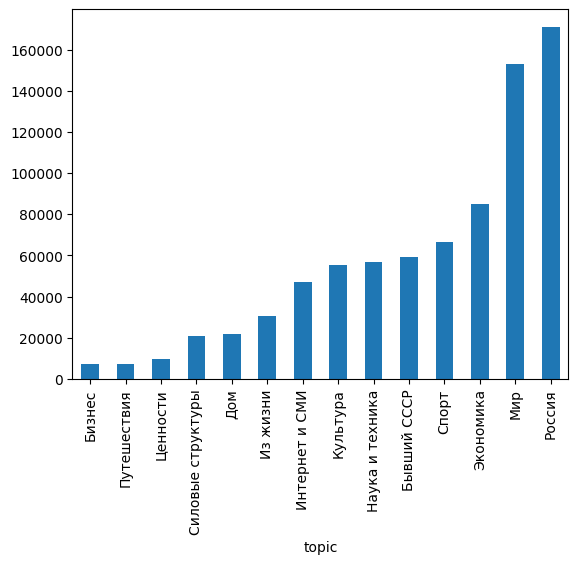

In [69]:
df['topic'].value_counts().sort_values().plot(kind='bar')

In [72]:
# import spacy.cli
# spacy.cli.download("ru_core_news_sm")

✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [73]:
import spacy

nlp = spacy.load(
    "ru_core_news_sm",
    disable=["parser", "ner", "attribute_ruler", "tok2vec"]
)

texts = df['text_clean'].tolist()
titles = df['title_clean'].tolist()

docs_text = nlp.pipe(texts, batch_size=50000, n_process=8)
docs_title = nlp.pipe(titles, batch_size=50000, n_process=8)


In [74]:
from tqdm.auto import tqdm

def process(doc):
    return ' '.join([tok.lemma_ for tok in doc if tok.is_alpha and not tok.is_stop])

In [75]:
df['title_clean'] = [process(doc) for doc in tqdm(docs_title, total=df.shape[0], desc="Titles processing")]

Lemmatization of titles:   0%|          | 0/791882 [00:00<?, ?it/s]

In [76]:
df['text_clean'] = [process(doc) for doc in tqdm(docs_text, total=df.shape[0], desc="Texts processing")]

Lemmatization of texts:   0%|          | 0/791882 [00:00<?, ?it/s]

In [79]:
df.head()

,url,title,text,topic,date,title_clean,text_clean,title_len,text_len
5,https://lenta.ru/news/1999/08/31/stancia_mir/,"Космонавты сомневаются в надежности ""Мира""",Как стало известно агентству Ассошиэйтед Пресс...,Россия,1999-08-31,космонавты сомневаются надежности мира,известно агентству ассошиэйтед пресс экипаж по...,5,190
6,https://lenta.ru/news/1999/08/31/vzriv/,Взрыв в центре Москвы: пострадало 30 человек,В зале игровых автоматов в третьем ярусе подзе...,Россия,1999-08-31,взрыв центре москвы пострадало человек,зале игровых автоматов третьем ярусе подземног...,6,154
7,https://lenta.ru/news/1999/08/31/credit_japs/,Япония кредитует Россию на полтора миллиарда д...,Япония приняла решение разморозить кредиты Рос...,Россия,1999-08-31,япония кредитует россию полтора миллиарда долл...,япония приняла решение разморозить кредиты рос...,7,185
8,https://lenta.ru/news/1999/08/31/diana/,Британцы отмечают двухлетие смерти Дианы,Британцы отмечают сегодня скорбную дату - втор...,Мир,1999-08-31,британцы отмечают двухлетие смерти дианы,британцы отмечают сегодня скорбную дату вторую...,5,297
9,https://lenta.ru/news/1999/08/31/mvf/,Отмытые через Bank of NY деньги не имели отнош...,В понедельник директор департамента внешних св...,Россия,1999-08-31,отмытые деньги имели отношения мвф,понедельник директор департамента внешних связ...,8,283


<Axes: xlabel='token'>

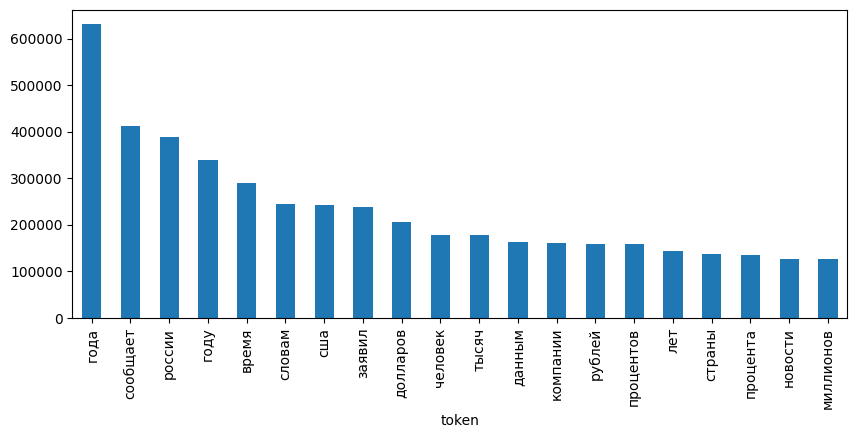

In [77]:
from collections import Counter

all_tokens = ' '.join(df['text_clean']).split()
common = Counter(all_tokens).most_common(20)
pd.DataFrame(common, columns=['token','count']).plot.bar(x='token', y='count', figsize=(10,4), legend=False)

In [78]:
df = df.sort_values('date').reset_index(drop=True)
df = df.drop(columns=['title_len', 'text_len', 'date'])

In [8]:
df = df.drop(df[df.isna().any(axis=1)].index)

In [9]:
train_end = int(df.shape[0] * 0.9)
val_end = int(df.shape[0] * 0.95)

train_df = df[:train_end]
val_df = df[train_end:val_end]
test_df = df[val_end:]

In [10]:
total_classes = df['topic'].unique().shape[0]

for split_name, split_df in [('train', train_df), ('val', val_df), ('test', test_df)]:
    vc = split_df['topic'].value_counts(normalize=True).round(4)
    print(f"\n{split_name.upper()} Classes distribution:\n", vc)
    print(f"All classes: {vc.shape[0] == total_classes}")


TRAIN распределение по классам (доля):
 topic
Россия               0.2201
Мир                  0.1869
Экономика            0.1083
Спорт                0.0868
Культура             0.0734
Бывший СССР          0.0727
Наука и техника      0.0720
Интернет и СМИ       0.0602
Из жизни             0.0365
Дом                  0.0293
Силовые структуры    0.0257
Бизнес               0.0104
Ценности             0.0097
Путешествия          0.0080
Name: proportion, dtype: float64
Есть все классы: True

VAL распределение по классам (доля):
 topic
Россия               0.1740
Мир                  0.1704
Экономика            0.1027
Спорт                0.0848
Наука и техника      0.0780
Из жизни             0.0701
Бывший СССР          0.0659
Интернет и СМИ       0.0639
Культура             0.0580
Силовые структуры    0.0437
Ценности             0.0355
Путешествия          0.0326
Дом                  0.0202
Бизнес               0.0001
Name: proportion, dtype: float64
Есть все классы: True

TEST распреде

In [11]:
train_df.to_csv('../data/train.csv', index=False)
val_df.to_csv('../data/val.csv', index=False)
test_df.to_csv('../data/test.csv', index=False)